In [49]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact
import plotly.express as px

from scipy import optimize
import matplotlib.pyplot as plt
# import the datetime module
import datetime as dt
import time
import matplotlib.patches as mpatches
from datetime import datetime
from utiles import *
import datetime

import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [60]:
data = pd.read_csv("data.csv")
data=data.set_index('Unnamed: 0')
data = data.drop(data[data['Event_first_revision_date'] == "0"].index) # drop empty Event date 73
data['Event_first_revision_date'] = pd.to_datetime(data['Event_first_revision_date'])
data['Event date']=[d.date() for d in data['Event_first_revision_date']]
data['year']=[h.year for h in data['Event date'] ]
data.columns=[dt.datetime.strptime(item, '%Y-%m-%d %H:%M:%S').date() for item in data.columns[:-4]]+list(data.columns[-4:].values)


# select one cat , for Immediate attention we evaluate the events that first happened after 2015 only
data=data[data["Category"]=="air_accidents"]
df=data.iloc[:,:-4].T
df.index = pd.to_datetime(df.index)


data1=data[data['Event date']>dt.date(2015,7,1)]
cat_df= data1.iloc[:,:-4].T
cat_df.index = pd.to_datetime(cat_df.index)
data2=data1[data1['Event date']<dt.date(2022,8,2) ]

df3=cat_df.copy() # views of air_accidents

In [3]:
data.columns[1]

datetime.date(2015, 7, 2)

In [4]:
data['Event date'][465]

datetime.date(2021, 10, 8)

In [5]:
list(data.columns).index(data['Event date'][465])

2291

In [6]:
data[data['Event date']==data['Event date'][465]].index[1]

'American Flyers Airline Flight 280'

In [7]:
data[465:466]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,Category,Event_first_revision_date,Event date,year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
American Flyers Airline Flight 280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,air_accidents,2021-10-08 03:30:45+00:00,2021-10-08,2021


In [172]:
data[data['Event date'][465]]

Unnamed: 0
American Airlines Flight 11           2064.0
United Airlines Flight 175            1360.0
Japan Airlines Flight 123             1658.0
Sita Air Flight 601                     11.0
China Eastern Airlines Flight 5210      39.0
                                       ...  
An-24 incident at Gambell, Alaska        1.0
Ansett-ANA Flight 149                   26.0
Ansett New Zealand Flight 703           75.0
Ariana Afghan Airlines Flight 701       24.0
United Express Flight 6291             103.0
Name: 2021-10-08, Length: 471, dtype: float64

In [8]:
data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,Category,Event_first_revision_date,Event date,year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
American Airlines Flight 11,1289.0,1410.0,1409.0,1292.0,1502.0,1483.0,1632.0,1446.0,1359.0,1392.0,...,2501.0,2433.0,2252.0,2356.0,2492.0,2567.0,air_accidents,2001-09-16 18:30:38+00:00,2001-09-16,2001
United Airlines Flight 175,799.0,843.0,930.0,870.0,905.0,1018.0,1067.0,1042.0,955.0,898.0,...,1488.0,1500.0,1403.0,1298.0,1504.0,1581.0,air_accidents,2001-09-14 00:26:43+00:00,2001-09-14,2001
Japan Airlines Flight 123,1044.0,1179.0,1164.0,861.0,892.0,1028.0,990.0,948.0,993.0,987.0,...,390.0,776.0,488.0,428.0,413.0,467.0,air_accidents,2004-09-10 22:52:50+00:00,2004-09-10,2004
Sita Air Flight 601,10.0,22.0,20.0,18.0,14.0,22.0,18.0,12.0,17.0,19.0,...,13.0,19.0,12.0,13.0,12.0,19.0,air_accidents,2012-09-28 09:55:19+00:00,2012-09-28,2012
China Eastern Airlines Flight 5210,22.0,27.0,33.0,29.0,31.0,49.0,31.0,31.0,30.0,36.0,...,111.0,123.0,93.0,153.0,119.0,158.0,air_accidents,2005-01-14 08:18:03+00:00,2005-01-14,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"An-24 incident at Gambell, Alaska",12.0,6.0,9.0,8.0,12.0,3.0,4.0,6.0,6.0,4.0,...,5.0,6.0,2.0,6.0,9.0,9.0,air_accidents,2015-08-05 21:47:13+00:00,2015-08-05,2015
Ansett-ANA Flight 149,14.0,14.0,23.0,9.0,26.0,13.0,20.0,16.0,14.0,6.0,...,12.0,11.0,12.0,8.0,13.0,16.0,air_accidents,2011-08-26 11:33:45+00:00,2011-08-26,2011
Ansett New Zealand Flight 703,29.0,24.0,43.0,54.0,27.0,33.0,34.0,35.0,23.0,40.0,...,91.0,131.0,115.0,70.0,95.0,99.0,air_accidents,2005-12-29 00:08:57+00:00,2005-12-29,2005


In [66]:
count=0
Immediate_attention_list=[]
for index, row in data2.iterrows():
    
    if (row['Event date']<data.columns[1]):
        print('birthday before')
    else:
        if all(row[:row['Event date']- datetime.timedelta(days=1) ].values == 0):
            
            print('-----------------')
            Immediate_attention_list.append(index)
            print(index)
            #print(row)
            #print(type(row))
            print('event day is : ', row['Event date'])
            print('birthday after 2015')
            print("yes correct")
            print(row[row['Event date']- datetime.timedelta(days=1): ].values)
            count=count+1

    #print(index,'ddd  ',data[data['Event date'][465]][index])

-----------------
Sabena Flight 503
event day is :  2016-02-02
birthday after 2015
yes correct
[0.0 80.0 43.0 ... Timestamp('2016-02-02 00:30:57+0000', tz='UTC')
 datetime.date(2016, 2, 2) 2016]
-----------------
KLM Flight 608
event day is :  2019-02-02
birthday after 2015
yes correct
[0.0 36.0 29.0 ... Timestamp('2019-02-02 19:07:51+0000', tz='UTC')
 datetime.date(2019, 2, 2) 2019]
-----------------
Pulkovo Aviation Enterprise Flight 9560
event day is :  2019-04-10
birthday after 2015
yes correct
[0.0 37.0 19.0 ... Timestamp('2019-04-10 00:33:20+0000', tz='UTC')
 datetime.date(2019, 4, 10) 2019]
-----------------
1981 Pushkin Tu-104 crash
event day is :  2017-03-14
birthday after 2015
yes correct
[0.0 0.0 0.0 ... Timestamp('2017-03-14 12:30:23+0000', tz='UTC')
 datetime.date(2017, 3, 14) 2017]
-----------------
1974 Leningrad Aeroflot Il-18 crash
event day is :  2018-02-16
birthday after 2015
yes correct
[0.0 24.0 25.0 ... Timestamp('2018-02-16 22:26:57+0000', tz='UTC')
 datetime.dat

In [69]:
Immediate_attention_list 

['Sabena Flight 503',
 'KLM Flight 608',
 'Pulkovo Aviation Enterprise Flight 9560',
 '1981 Pushkin Tu-104 crash',
 '1974 Leningrad Aeroflot Il-18 crash',
 'Aeroflot Flight 1912',
 'Aeroflot Flight 3739 (1976)',
 'Aeroflot Flight 2022',
 'Aeroflot Flight 3630',
 'Aeroflot Flight 5484',
 '1978 Yegoryevsk Tu-144 crash',
 'Interflug Flight 102',
 '2016 Russian Defence Ministry Tupolev Tu-154 crash',
 '2016 Alfa Indonesia DHC-4 crash',
 'World Airways Flight 802',
 'Tropical Airways Flight 1301',
 '1965 USAF KC-135 Wichita crash',
 '2000 Marsa Brega Short 360 crash',
 '1931 Jinan air crash',
 'KLM Flight 592',
 'Aeroflot Flight 2808',
 'Aeroflot Flight 6709']

In [34]:
current_dates = [dt.datetime.strptime(item, '%Y-%m-%d %H:%M:%S').date() for item in data.columns[:-4]]

In [3]:
# #wikipediaapi_accidents contains the airplane crushes accidents view logs
# wikipediaapi_accidents=pd.read_csv("wikipediaapi_accidents.csv")
# wikipediaapi_accidents=wikipediaapi_accidents[wikipediaapi_accidents['Category']=='Category:Airliner accidents and incidents caused by pilot error']
# wikipediaapi_accidents=wikipediaapi_accidents.set_index('Unnamed: 0')
# wikipediaapi_accidents['Event date'] = pd.to_datetime(wikipediaapi_accidents['Event date'])
# wikipediaapi_accidents['Event date']=[d.date() for d in wikipediaapi_accidents['Event date']]

# # logs smoothed monthly window
# df=wikipediaapi_accidents.iloc[:,:-3].T
# df.index = pd.to_datetime(df.index)
# df1=df.rolling(7).mean().iloc[6:,:]

# df2=df[df.columns[df.mean()>50]]
# df_2019=wikipediaapi_accidents[wikipediaapi_accidents['Event date']>dt.date(2015,1,1)]
# df3=df_2019.iloc[:,:-3].T
# df3=df3.rolling(7).mean().iloc[6:,:]
# df3=df3[df3.columns[df3.mean()>5]]


In [81]:
data.iloc[1:2]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,Category,Event_first_revision_date,Event date,year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
United Airlines Flight 175,799.0,843.0,930.0,870.0,905.0,1018.0,1067.0,1042.0,955.0,898.0,...,1488.0,1500.0,1403.0,1298.0,1504.0,1581.0,air_accidents,2001-09-14 00:26:43+00:00,2001-09-14,2001


In [79]:
Immediate_attention_list

['Sabena Flight 503',
 'KLM Flight 608',
 'Pulkovo Aviation Enterprise Flight 9560',
 '1981 Pushkin Tu-104 crash',
 '1974 Leningrad Aeroflot Il-18 crash',
 'Aeroflot Flight 1912',
 'Aeroflot Flight 3739 (1976)',
 'Aeroflot Flight 2022',
 'Aeroflot Flight 3630',
 'Aeroflot Flight 5484',
 '1978 Yegoryevsk Tu-144 crash',
 'Interflug Flight 102',
 '2016 Russian Defence Ministry Tupolev Tu-154 crash',
 '2016 Alfa Indonesia DHC-4 crash',
 'World Airways Flight 802',
 'Tropical Airways Flight 1301',
 '1965 USAF KC-135 Wichita crash',
 '2000 Marsa Brega Short 360 crash',
 '1931 Jinan air crash',
 'KLM Flight 592',
 'Aeroflot Flight 2808',
 'Aeroflot Flight 6709']

In [92]:
data=data[data.index.isin(Immediate_attention_list)]
df3= data.iloc[:,:-4].T
df3.index = pd.to_datetime(df3.index)
df3

Unnamed: 0,Sabena Flight 503,KLM Flight 608,Pulkovo Aviation Enterprise Flight 9560,1981 Pushkin Tu-104 crash,1974 Leningrad Aeroflot Il-18 crash,Aeroflot Flight 1912,Aeroflot Flight 3739 (1976),Aeroflot Flight 2022,Aeroflot Flight 3630,Aeroflot Flight 5484,...,2016 Russian Defence Ministry Tupolev Tu-154 crash,2016 Alfa Indonesia DHC-4 crash,World Airways Flight 802,Tropical Airways Flight 1301,1965 USAF KC-135 Wichita crash,2000 Marsa Brega Short 360 crash,1931 Jinan air crash,KLM Flight 592,Aeroflot Flight 2808,Aeroflot Flight 6709
2015-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,5.0,6.0,443.0,88.0,6.0,17.0,16.0,7.0,1.0,10.0,...,112.0,3.0,6.0,4.0,30.0,11.0,3.0,6.0,42.0,7.0
2022-07-29,7.0,5.0,131.0,55.0,3.0,6.0,10.0,10.0,6.0,3.0,...,78.0,7.0,4.0,5.0,33.0,9.0,5.0,2.0,17.0,8.0
2022-07-30,23.0,7.0,28.0,24.0,6.0,12.0,9.0,9.0,4.0,4.0,...,59.0,5.0,7.0,5.0,30.0,11.0,6.0,6.0,20.0,10.0
2022-07-31,3.0,4.0,22.0,35.0,3.0,8.0,7.0,7.0,4.0,3.0,...,72.0,7.0,8.0,9.0,18.0,7.0,6.0,9.0,14.0,8.0


In [97]:
lst=data[data['year']==2017].index
lst

Index(['1981 Pushkin Tu-104 crash', 'Aeroflot Flight 1912',
       'Aeroflot Flight 3739 (1976)', 'Aeroflot Flight 5484',
       'Tropical Airways Flight 1301', '1965 USAF KC-135 Wichita crash',
       '2000 Marsa Brega Short 360 crash', '1931 Jinan air crash',
       'Aeroflot Flight 2808'],
      dtype='object', name='Unnamed: 0')

In [89]:
sub_list=[x for x in df3.columns if x in lst]
sub_list

[]

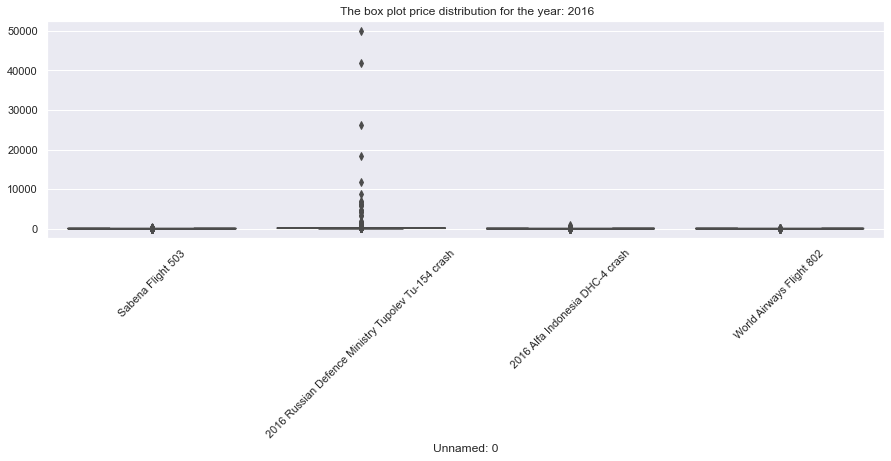

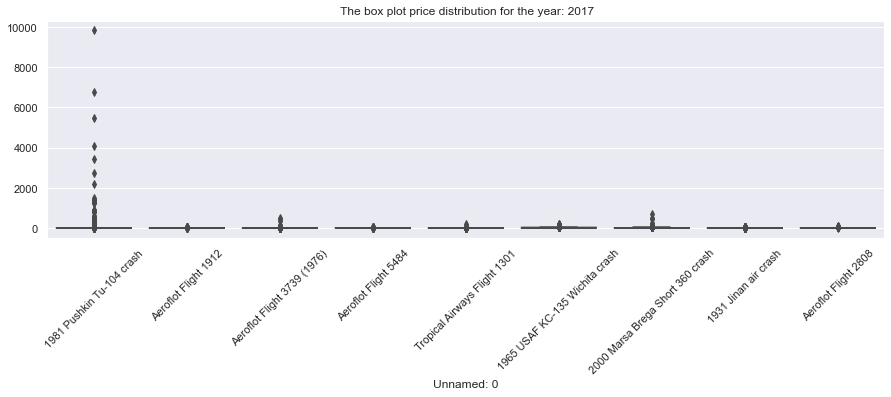

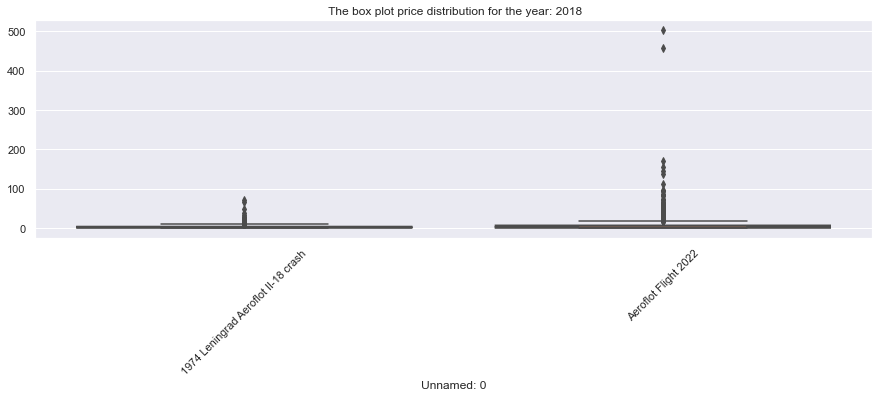

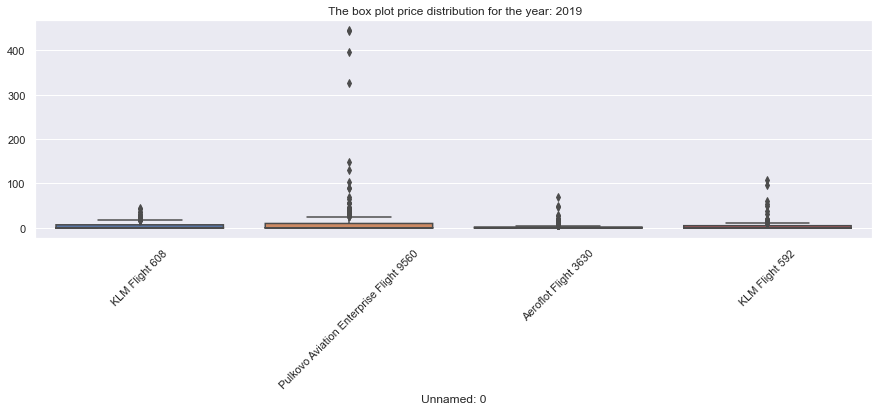

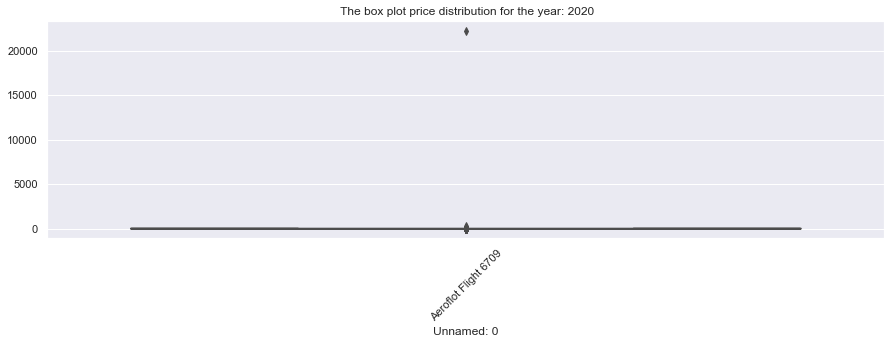

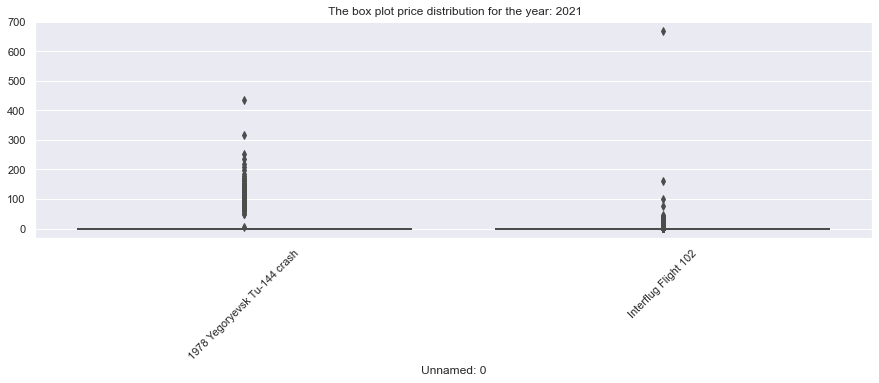

In [98]:
data=data[data.index.isin(Immediate_attention_list)]
df3= data.iloc[:,:-4].T
df3.index = pd.to_datetime(df3.index)
for year in range(2016,2022):
    
    lst=data[data['year']==year].index
    plt.figure()
    sns.set(rc={'figure.figsize':(15,4)})
    sub_list=[x for x in df3.columns if x in lst]
    ax =sns.boxplot(data=df3[sub_list],notch = 'True')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    ax.set_title(' The box plot price distribution for the year: '+ str(year))


In [ ]:
############### fix first date of event

In [82]:
[i for i, e in enumerate(data.T["Cubana de Aviación Flight 389"][:-4]) if e > 0][0]

5

In [113]:

for year in range(2016,2022):
    lst=data[data['year']==year].index
    #plt.figure()
    #sns.set(rc={'figure.figsize':(15,4)})
    sub_list=[x for x in df3.columns if x in lst]
    fig =px.line(df3[sub_list])
    fig.show()
    


KeyError: 'Unnamed: 0'

# Peak Event Coincidence Analysis

In [103]:
df3

Unnamed: 0,Sabena Flight 503,KLM Flight 608,Pulkovo Aviation Enterprise Flight 9560,1981 Pushkin Tu-104 crash,1974 Leningrad Aeroflot Il-18 crash,Aeroflot Flight 1912,Aeroflot Flight 3739 (1976),Aeroflot Flight 2022,Aeroflot Flight 3630,Aeroflot Flight 5484,...,2016 Russian Defence Ministry Tupolev Tu-154 crash,2016 Alfa Indonesia DHC-4 crash,World Airways Flight 802,Tropical Airways Flight 1301,1965 USAF KC-135 Wichita crash,2000 Marsa Brega Short 360 crash,1931 Jinan air crash,KLM Flight 592,Aeroflot Flight 2808,Aeroflot Flight 6709
2015-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,5.0,6.0,443.0,88.0,6.0,17.0,16.0,7.0,1.0,10.0,...,112.0,3.0,6.0,4.0,30.0,11.0,3.0,6.0,42.0,7.0
2022-07-29,7.0,5.0,131.0,55.0,3.0,6.0,10.0,10.0,6.0,3.0,...,78.0,7.0,4.0,5.0,33.0,9.0,5.0,2.0,17.0,8.0
2022-07-30,23.0,7.0,28.0,24.0,6.0,12.0,9.0,9.0,4.0,4.0,...,59.0,5.0,7.0,5.0,30.0,11.0,6.0,6.0,20.0,10.0
2022-07-31,3.0,4.0,22.0,35.0,3.0,8.0,7.0,7.0,4.0,3.0,...,72.0,7.0,8.0,9.0,18.0,7.0,6.0,9.0,14.0,8.0


In [104]:
import peca
df3=df3.iloc[:,5:15]
df3.index= pd.to_datetime(df3.index)
date_range=df3.index
indexs = data[['Event date']].groupby("Event date").sum().index.copy()
eventseries = pd.Series(index=indexs, data=([1] * len(indexs)),name="GTD").reindex(date_range).fillna(0).values
timeseries_df=df3.copy()
keywords = timeseries_df.columns

def preprocess(df, loc):
    output = df.copy()
    output = np.log2(output + 1)
    output = output - output.rolling(window=30).mean()
    output = output.loc[loc].values
    return output

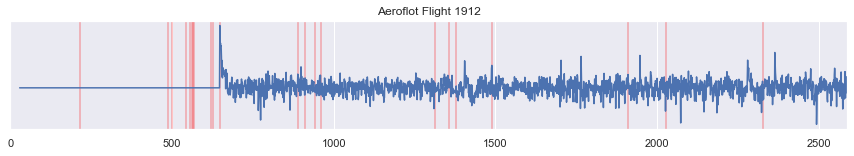

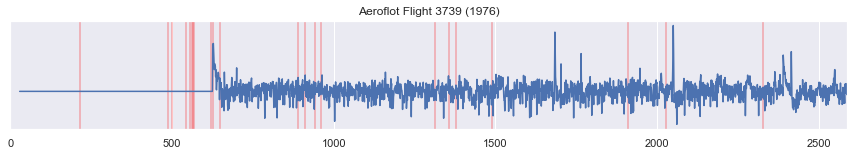

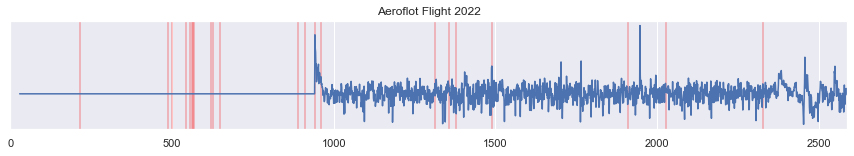

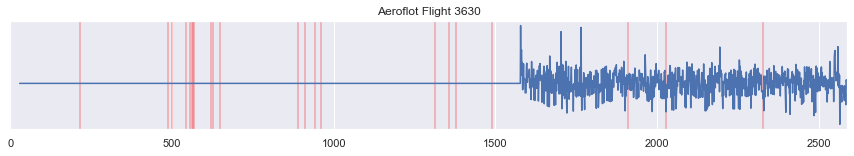

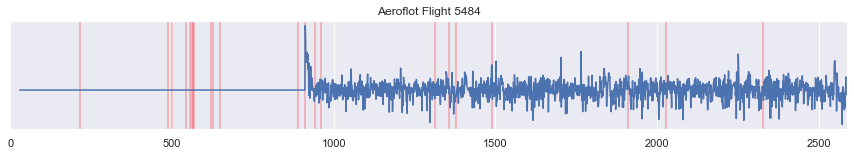

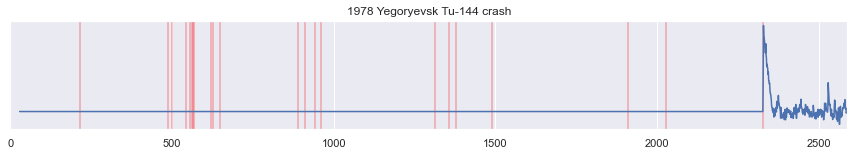

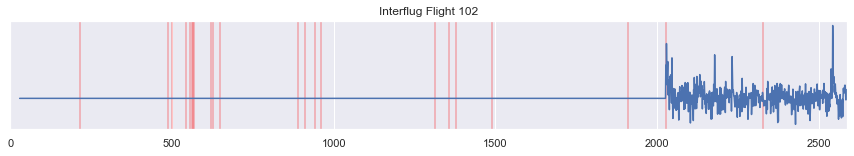

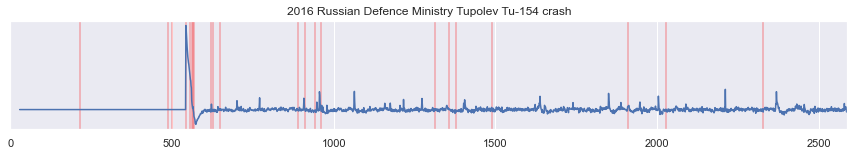

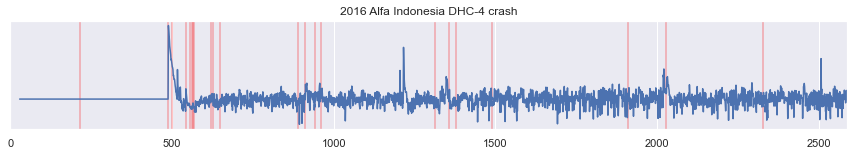

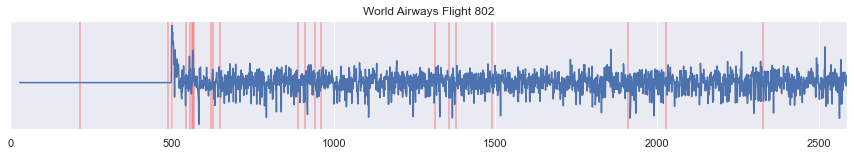

In [105]:

for keyword in keywords:
    # without preprocessing
    #timeseries = timeseries_df[keyword].loc[date_range].values
    
    # with preprocessing
    timeseries = preprocess(timeseries_df[keyword], df3.index)

    plt.figure(figsize=(15, 2))
    plt.title(keyword)
    for event in np.where(eventseries == 1)[0]:
        plt.axvline(event, color="red", alpha=0.3)
    plt.plot(timeseries)
    plt.xlim(0, len(timeseries)-1)
    plt.yticks([])
    plt.show()

FIG 1. Daily views volume of the events analyzed in this category. The vertical lines indicate impact dates dates

Aeroflot Flight 1912


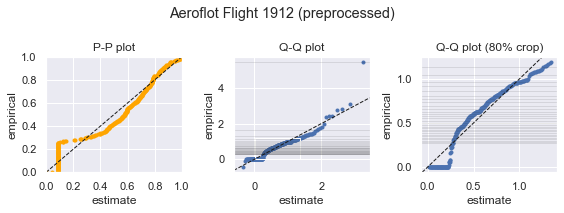

Aeroflot Flight 3739 (1976)


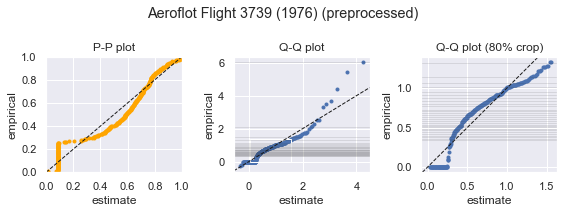

Aeroflot Flight 2022


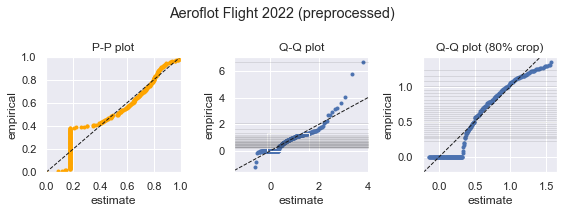

Aeroflot Flight 3630


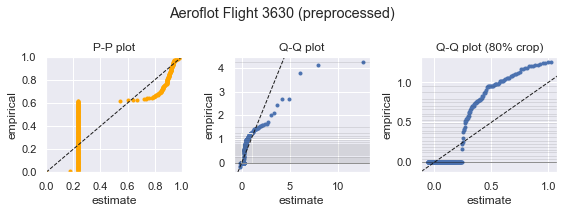

Aeroflot Flight 5484


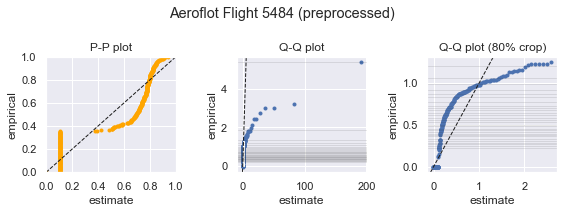

1978 Yegoryevsk Tu-144 crash


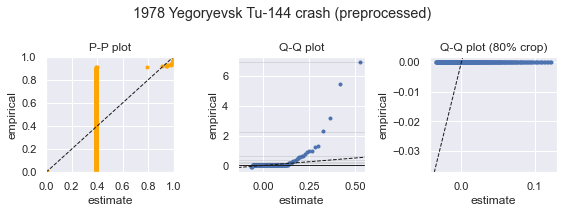

Interflug Flight 102


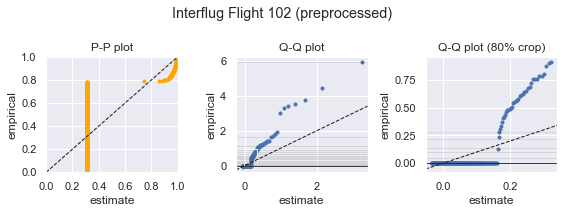

2016 Russian Defence Ministry Tupolev Tu-154 crash


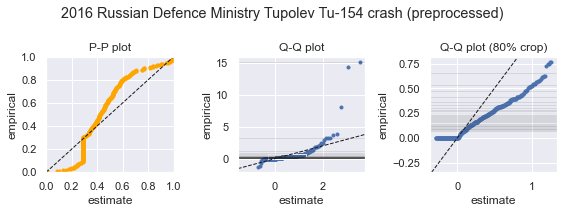

2016 Alfa Indonesia DHC-4 crash


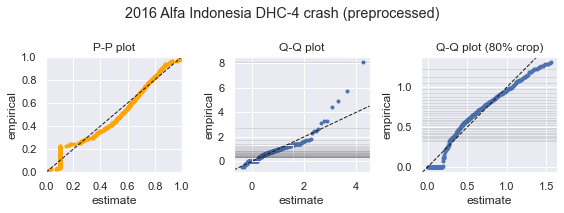

World Airways Flight 802


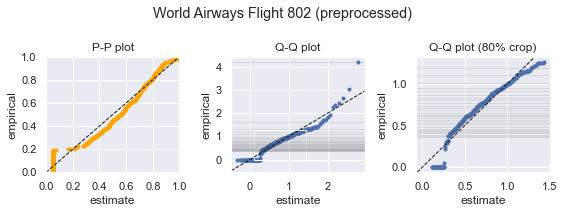

In [106]:
preprocessing = True
delta = 7

for keyword in keywords:
    if preprocessing:
        timeseries = preprocess(timeseries_df[keyword], date_range)
    else:
        timeseries = timeseries_df[keyword].loc[date_range].values
    print(keyword)
    timeseries[np.isnan(timeseries)] = 0
    peca.plot_gev_diagnostics(
        timeseries,
        blocksize=delta + 1,
        q_crop_percentile=10,
        thresh_marker=np.percentile(timeseries, np.linspace(75, 100, 32)),
        title=keyword + (' (preprocessed)' if preprocessing else ' (raw)')
    )

The P-P plot suggests that the GEV distribution provides a more or less decent fit for the block maxima of the preprocessed time series---with the best fit on #stopislam and the worst fit on #notinmyname. The S-shaped curve for #notinmyname reveals that the empirical variance of the block maxima is slightly smaller than the estimated variance from the GEV distribution.

The Q-Q plot indicates that the probabilities of the highest quantiles (top 10%) of the block maxima may be underestimated by the GEV distribution. This means that the success probabilities in the GEV-based binomial distribution for the number of trigger coincidences (Equations 13 and 14) may also be underestimated for very high thresholds. The pointwise p-values (Equation 7) for these thresholds may be smaller than the true p-values, which means that we may flag an assocation at very high thresholds as statistically significant although it is not.

In our study (Section 5), we choose 32 thresholds from the empirical quantiles of the full time series (as opposed to quantiles from the block maxima of the time series). The horizontal lines in the Q-Q plots above show the thresholds used in our study. The vast majority lies in a region where the GEV distribution provides an accurate fit or overestimates the success probabilities. The pointwise p-values used in our study can therefore be considered conservative.

When looking at the goodness-of-fit for the block maxima of the raw time series (without preprocessing), the situation changes. The GEV distribution provides an accurate fit for #notinmyname, but not for the other two keywords.

In [107]:
df3

Unnamed: 0,Aeroflot Flight 1912,Aeroflot Flight 3739 (1976),Aeroflot Flight 2022,Aeroflot Flight 3630,Aeroflot Flight 5484,1978 Yegoryevsk Tu-144 crash,Interflug Flight 102,2016 Russian Defence Ministry Tupolev Tu-154 crash,2016 Alfa Indonesia DHC-4 crash,World Airways Flight 802
2015-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-07-28,17.0,16.0,7.0,1.0,10.0,124.0,14.0,112.0,3.0,6.0
2022-07-29,6.0,10.0,10.0,6.0,3.0,95.0,20.0,78.0,7.0,4.0
2022-07-30,12.0,9.0,9.0,4.0,4.0,102.0,26.0,59.0,5.0,7.0
2022-07-31,8.0,7.0,7.0,4.0,3.0,101.0,27.0,72.0,7.0,8.0


#### Test whether birthday of other events systematically trigger bursts peaks on events that belong to a cat. exp on "Northwest Airlines Flight 6231"

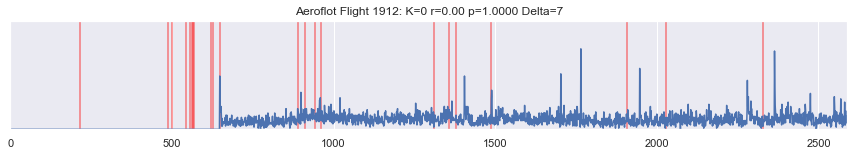

In [110]:
# NOTE: This is an illustrative example that uses the raw time series to
# illustrate an application of our method with a fixed and interpretable
# threshold. In this example, the GEV distribution DOES NOT provide an
# adequate fit to the block maxima. Therefore, the reported p-value
# DOES NOT reflect the actual statistical significance of the result. 

keyword = "Aeroflot Flight 1912"
n_events = eventseries.sum()

timeseries = timeseries_df[keyword].loc[date_range].values
thresh = 100
taus = np.array([thresh])

tcp_ = peca.tcp(timeseries, eventseries, delta, taus)
tcp_params = peca.tcp_params_fit(timeseries, delta, taus)
pval = peca.tcp_marginal_pval(tcp_, n_events, tcp_params)

plt.figure(figsize=(15, 2))
plt.title(f"{keyword}: "
          f"K={tcp_[0]:.0f} "
          f"r={(tcp_[0]/n_events):.2f} "
          f"p={pval[0]:.4f} Delta={delta:.0f}")
for exceedance in np.where(timeseries > thresh)[0]:
    plt.axvline(exceedance, color="blue", alpha=0.1)
for event in np.where(eventseries == 1)[0]:
    plt.axvline(event, color="red", alpha=0.5)
plt.plot(timeseries)
plt.xlim(0, len(timeseries))
plt.yticks([])
plt.ylim((0, thresh))
plt.show()

In [111]:
rhos = np.linspace(0.75, 1, 32)
delta = 7
simuls = 10000
alpha = 0.05

6it [03:33, 35.67s/it]


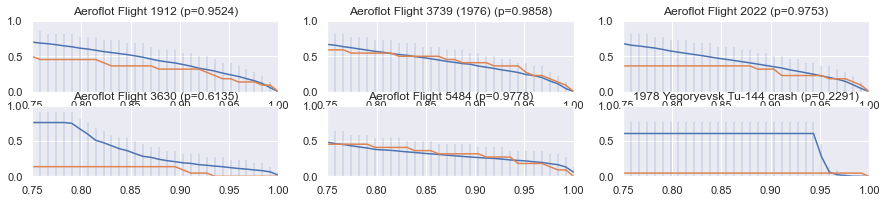

In [112]:
from tqdm import tqdm 
from scipy import stats
from statsmodels.stats import multitest
#21 min to run for 37 event
plt.figure(figsize=(15, 20))
for i, keyword in tqdm(enumerate(keywords[:6])):
    timeseries = preprocess(timeseries_df[keyword], date_range)
    timeseries[np.isnan(timeseries)] = 0
    taus = np.percentile(timeseries, rhos * 100)
    tcp_params = peca.tcp_params_fit(timeseries, delta, taus)
    tcp_ = peca.tcp(timeseries, eventseries, delta, taus)
    pval, _ = peca.tcp_nll_pval_shuffle(timeseries, eventseries,
                                        delta, taus, simuls)

    plt.subplot(13, 3, i + 1)
    plt.plot(rhos, peca.tcp_marginal_expectation(
        n_events, tcp_params) / n_events)
    plt.vlines(rhos, np.zeros_like(rhos),
               stats.binom.ppf(1 - alpha, n_events,
                               tcp_params[0]) / n_events, alpha=0.2)
    plt.plot(rhos, tcp_ / n_events)
    plt.xlim((rhos[0], rhos[-1]))
    plt.ylim((0, 1))
    plt.title(f"{keyword} (p{('=' if pval > 0.0001 else '<')}"
              f"{(pval if pval > 0.0001 else 0.0001):.4f})")
plt.show()

#### Alternative: Multiple hypothesis testing approach with pointwise p-values

In [109]:

for i, keyword in enumerate(keywords):
    timeseries = preprocess(timeseries_df[keyword], date_range)
    timeseries[np.isnan(timeseries)] = 0
    taus = np.percentile(timeseries, rhos * 100)
    tcp_params = peca.tcp_params_fit(timeseries, delta, taus)

    tcp_ = peca.tcp(timeseries, eventseries, delta, taus)
    pvals = peca.tcp_marginal_pval(tcp_, n_events, tcp_params)

    print(keyword)
    for method in ["b", "s", "hs", "h"]:
        reject, pvals_adj, _, _ = multitest.multipletests(
            pvals, alpha=alpha, method=method)
        print("\t", method, "\t",
              "reject" if reject.any() else "no reject",
              "(p=%.4f)" % pvals_adj.min())

NameError: name 'rhos' is not defined

In [9]:
df_peak_timestamps=ts2peak(lst)
df_peak_timestamps

,Timestamps,right_ips,left_ips,right_bases,left_bases,prominences,Value,widths,width_heights,days,months,year,event,distance_2_peak
0,2018-01-31,918.865909,888.898190,1050,192,12.966667,18.866667,29.967719,12.383333,Wednesday,1.0,2018.0,1946 Railway Air Services Dakota crash,NaT
1,2018-07-07,1088.613527,1058.698020,1094,1050,10.133333,17.266667,29.915507,12.200000,Saturday,7.0,2018.0,1946 Railway Air Services Dakota crash,157 days
2,2018-10-27,1200.536986,1170.484765,1237,192,16.466667,25.233333,30.052222,17.000000,Saturday,10.0,2018.0,1946 Railway Air Services Dakota crash,112 days
3,2019-02-27,1312.880851,1282.088608,1802,192,41.800000,46.366667,30.792243,25.466667,Wednesday,2.0,2019.0,1946 Railway Air Services Dakota crash,123 days
4,2020-01-01,1640.346154,1587.876812,1802,1508,18.433333,24.166667,52.469342,14.950000,Wednesday,1.0,2020.0,1946 Railway Air Services Dakota crash,308 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2022-03-09,2417.355107,2413.229938,2424,2412,16.633333,132.433333,4.125169,124.116667,Wednesday,3.0,2022.0,West Air Sweden Flight 294,15 days
32,2022-04-06,2443.159851,2433.911392,2444,2346,15.066667,224.133333,9.248459,216.600000,Wednesday,4.0,2022.0,West Air Sweden Flight 294,28 days
33,2022-04-19,2457.935302,2427.048327,2535,2346,145.533333,238.933333,30.886975,166.166667,Tuesday,4.0,2022.0,West Air Sweden Flight 294,13 days
34,2022-06-02,2512.163121,2492.110266,2535,2481,27.466667,125.900000,20.052854,112.166667,Thursday,6.0,2022.0,West Air Sweden Flight 294,44 days


In [201]:
len(df_peak_timestamps.event.unique())

30

In [94]:
x=range(1159)


range(0, 1159)

In [59]:
# for each event get the characteristics of its peaks in Flights_peak_features
Flights_peak_features = pd.read_csv("Flights_peak_features.csv")
Flights_peak_features.drop('Unnamed: 0', axis=1, inplace=True)
Flights_peak_features.sort_values(by=['Timestamps','prominences'], ignore_index=True, inplace=True)
Flights_peak_features['Timestamps'] = pd.to_datetime(Flights_peak_features['Timestamps'])
Flights_peak_features['Peak date'] =[d.date() for d in Flights_peak_features['Timestamps']]
Flights_peak_features.head(2)

,Timestamps,right_ips,left_ips,right_bases,left_bases,prominences,Value,widths,width_heights,days,months,year,event,distance_2_peak,Peak date
0,2019-01-02,1.322581,0.5,2,0,20.0,131.0,0.822581,121.0,Wednesday,1,2019,Korean Air Cargo Flight 8509,-1303 days,2019-01-02
1,2019-01-02,1.407407,0.5,11,0,22.0,117.0,0.907407,106.0,Wednesday,1,2019,Lufthansa Flight 540,-1209 days,2019-01-02


question here is :  after initial event date when is the max boost in viewership
 after max viw how can we model the decay?

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated



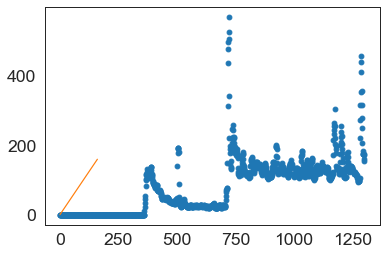

In [163]:


y = df3['PenAir Flight 3296'].values
x = range(1303)

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0, x >= x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 160, 1200)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

i dea plot the dostribution in th neiberhood of the highest peak

In [202]:
df3.max()

Unnamed: 0
1946 Railway Air Services Dakota crash                       127.571429
1990 Faucett Perú Boeing 727 disappearance                   292.285714
1991 Vallejo helicopter crash                                299.714286
Aeroflot Flight 2808                                          39.571429
Aeroflot Flight 6709                                        3229.571429
Aeroméxico Connect Flight 2431                              2500.142857
Air Canada Flight 624                                        728.857143
Air Canada Flight 759                                       2390.285714
Air Caraïbes Flight 1501                                      94.571429
Airborne Express Flight 827                                  153.714286
Asiana Airlines Flight 162                                   570.142857
Atlas Air Flight 3591                                       9481.000000
Avia Traffic Company Flight 768                              121.000000
Bangkok Airways Flight 125                           

In [203]:
from numpy import mean
from numpy import std

data1 = df3['EgyptAir Flight 804']
data2 = df3['Ryan International Airlines Flight 590']
data3 = df3['TransAsia Airways Flight 791']
data4 = df3['PenAir Flight 3296']
# summarize
print('CZ: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('DE: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('NL: mean=%.3f stdv=%.3f' % (mean(data3), std(data3)))
print('LAN-Chile Flight 1069: mean=%.3f stdv=%.3f' % (mean(data4), std(data4)))

CZ: mean=539.555 stdv=3155.757
DE: mean=7.692 stdv=18.641
NL: mean=7.476 stdv=9.133
LAN-Chile Flight 1069: mean=39.479 stdv=66.747


In [204]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=525207.000, p=0.000
Different distribution (reject H0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.001733,1737.964746,-17608.612669,inf,0.433625,3.006580e-223
expon,0.002129,1605.989739,-17347.621906,inf,0.277053,6.539116e-89
norm,0.002582,2265.359925,-17096.144793,inf,0.156104,3.382806e-28


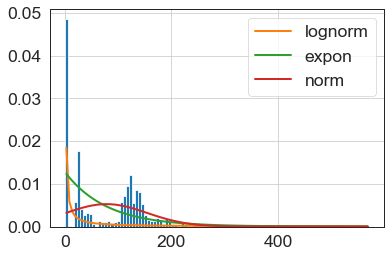

In [174]:
f = Fitter(data4, distributions=['expon','lognorm',"norm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.832386e-07,13568.755391,-60346.887215,inf,0.320625,1.016596e-236
lognorm,2.675154e-07,4074.316973,-59361.654844,inf,0.150775,9.947823e-52
cauchy,3.398920e-07,3354.142428,-58751.009800,inf,0.174408,3.485218e-69
exponpow,1.202690e-06,2535.057149,-55479.046859,inf,0.425690,0.000000e+00
chi2,1.263283e-06,3050.973414,-55352.084801,inf,0.704618,0.000000e+00


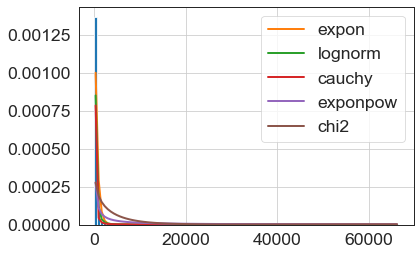

In [206]:
f1 = Fitter(data1,distributions= get_common_distributions())
f1.fit()
f1.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.024981,14455.546264,-14131.729881,inf,0.510356,2.708904e-315
chi2,0.037382,1322.948307,-13606.541778,inf,0.510361,2.668024e-315
expon,0.040897,1991.684041,-13496.633073,inf,0.510361,2.668024e-315
powerlaw,0.043020,1140.250350,-13423.506801,inf,0.519220,0.000000e+00
exponpow,0.044199,1225.097989,-13388.271948,inf,0.510361,2.668024e-315


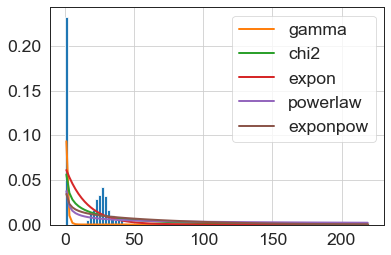

In [170]:
f1 = Fitter(data2,distributions= get_common_distributions())
f1.fit()
f1.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.049007,1016.673020,-13260.896388,inf,0.109300,5.184912e-14
norm,0.062986,1294.696537,-12933.922604,inf,0.131118,5.418854e-20
gamma,0.063516,1269.741626,-12915.829468,inf,0.134173,6.436033e-21
rayleigh,0.076133,1037.745667,-12686.908291,inf,0.207366,1.276353e-49
powerlaw,0.085723,836.171320,-12525.144973,inf,0.341667,2.777196e-136


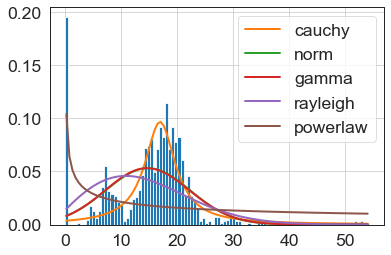

In [169]:
f1 = Fitter(data3,distributions= get_common_distributions())
f1.fit()
f1.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.001305,2045.244462,-17978.471460,inf,0.414323,5.530035e-203
exponpow,0.001373,1525.811867,-17911.706805,inf,0.277053,6.539116e-89
lognorm,0.001733,1737.964746,-17608.612669,inf,0.433625,3.006580e-223
gamma,0.001811,1765.599014,-17551.387126,inf,0.305476,2.042113e-108
powerlaw,0.001949,1320.239301,-17455.702806,inf,0.381687,3.414688e-171


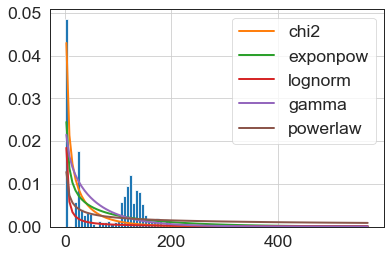

In [172]:
f1 = Fitter(data4,distributions= get_common_distributions())
f1.fit()
f1.summary()

##  CausalImpact 

what are the main impact points

rank of disaster : what is the effect of 

In [8]:
# how close to each othere are peaks avg in days
#randomly indexed peaks is 12 avg (little or much) placing th epeak randomly and then look how far are the peaks

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    295.98             108328.77
Prediction (s.d.)         230.6 (10.6)       84399.42 (3881.03)
95% CI                    [209.86, 251.43]   [76809.77, 92023.14]

Absolute effect (s.d.)    65.38 (10.6)       23929.35 (3881.03)
95% CI                    [44.55, 86.12]     [16305.62, 31519.0]

Relative effect (s.d.)    28.35% (4.6%)      28.35% (4.6%)
95% CI                    [19.32%, 37.35%]   [19.32%, 37.35%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


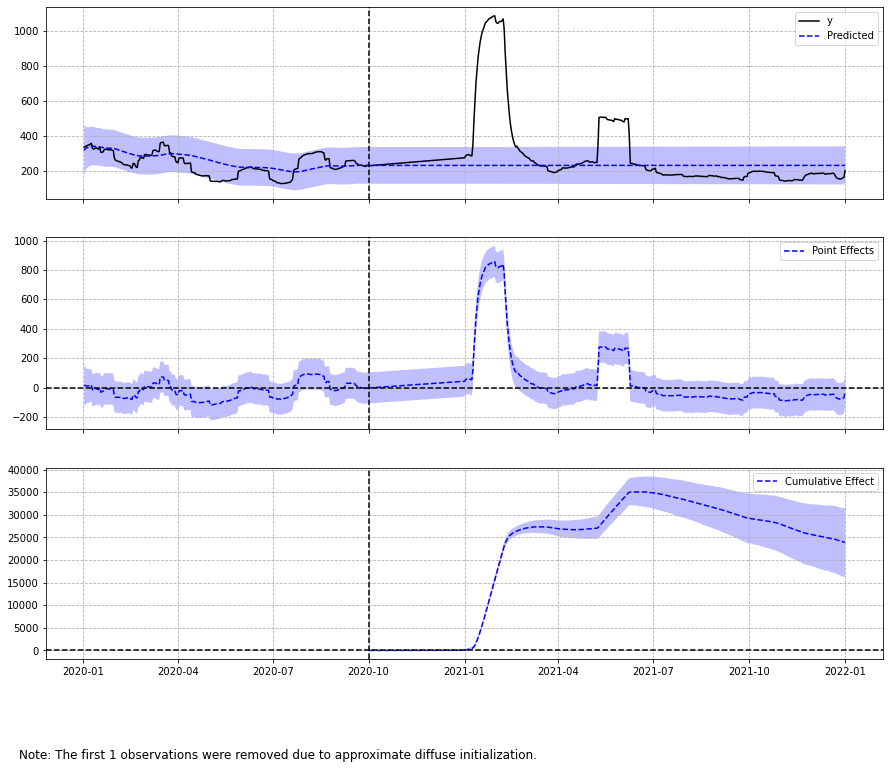

In [7]:
df=df1[['Adam Air Flight 574']]
# define the 'before' and 'after' periods
pre_period  = [ pd.Timestamp('2020-01-01') , pd.Timestamp('2020-10-01') ]
post_period = [ pd.Timestamp('2021-01-01') , pd.Timestamp('2022-01-01') ]
ci = CausalImpact(df, pre_period, post_period)
print(ci.summary())
#print(ci.summary(output='report'))
ci.plot()